In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ted_main.csv')
print(df.head())


   comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1

In [ ]:
df.shape

(2550, 17)

In [ ]:
df.isnull().sum()

,0
comments,0
description,0
duration,0
event,0
film_date,0
languages,0
main_speaker,0
name,0
num_speaker,0
published_date,0


In [ ]:
df['name'] = df['title'] + ' ' + df['name']

# Removing the unnecessary information
df = df[['main_speaker', 'name']]
df.dropna(inplace = True)
df.head()

,main_speaker,name
0,Ken Robinson,Do schools kill creativity? Ken Robinson: Do s...
1,Al Gore,Averting the climate crisis Al Gore: Averting ...
2,David Pogue,Simplicity sells David Pogue: Simplicity sells
3,Majora Carter,Greening the ghetto Majora Carter: Greening th...
4,Hans Rosling,The best stats you've ever seen Hans Rosling: ...


In [ ]:
data = df.copy()

In [ ]:
def remove_stopwords(text):
  stop_words = stopwords.words('english')

  imp_words = []

  # Storing the important words
  for word in str(text).split():
    word = word.lower()

    if word not in stop_words:
      imp_words.append(word)

  output = " ".join(imp_words)

  return output

In [ ]:
df['name'] = df['name'].apply(lambda text: remove_stopwords(text))
df.head()

,main_speaker,name
0,Ken Robinson,schools kill creativity? ken robinson: schools...
1,Al Gore,averting climate crisis al gore: averting clim...
2,David Pogue,simplicity sells david pogue: simplicity sells
3,Majora Carter,greening ghetto majora carter: greening ghetto
4,Hans Rosling,best stats ever seen hans rosling: best stats ...


In [ ]:
punctuations_list = string.punctuation


def cleaning_punctuations(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)


df['name'] = df['name'].apply(lambda x: cleaning_punctuations(x))
df.head()

,main_speaker,name
0,Ken Robinson,schools kill creativity ken robinson schools k...
1,Al Gore,averting climate crisis al gore averting clima...
2,David Pogue,simplicity sells david pogue simplicity sells
3,Majora Carter,greening ghetto majora carter greening ghetto
4,Hans Rosling,best stats ever seen hans rosling best stats e...


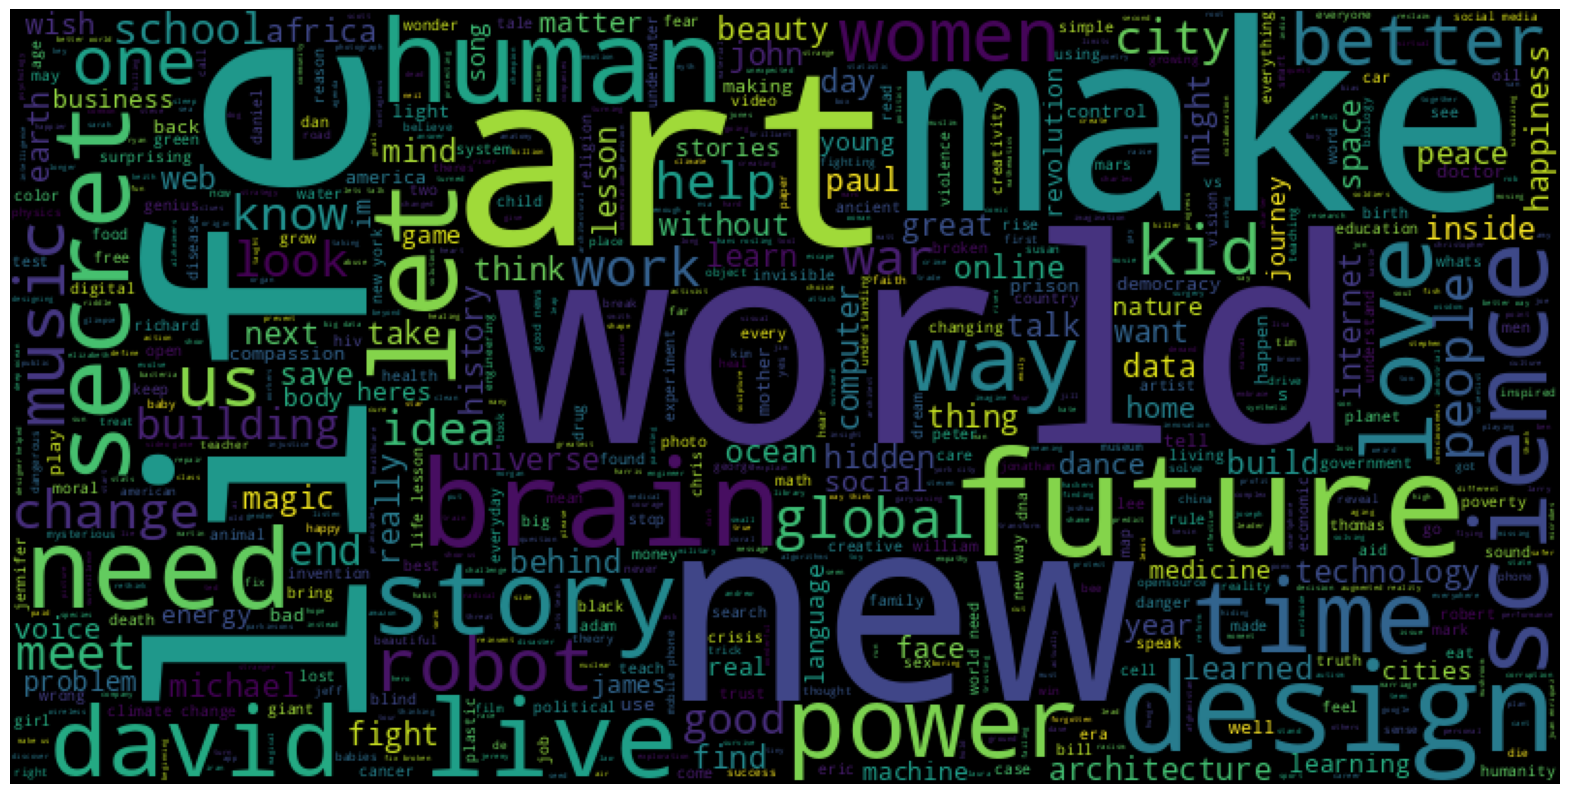

In [ ]:
details_corpus = " ".join(df['name'])

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000,
               width=800,
               height=400).generate(details_corpus)
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df['name'])

In [ ]:
def get_similarities(talk_content, data=df):

    # Getting vector for the input talk_content.
    talk_array1 = vectorizer.transform(talk_content).toarray()

    # We will store similarity for each row of the dataset.
    sim = []
    pea = []
    for idx, row in data.iterrows():
        details = row['name']

        # Getting vector for current talk.
        talk_array2 = vectorizer.transform(
            data[data['name'] == details]['name']).toarray()

        # Calculating cosine similarities
        cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

        # Calculating pearson correlation
        pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

        sim.append(cos_sim)
        pea.append(pea_sim)

    return sim, pea

In [ ]:
def recommend_talks(talk_content, data=data):

    data['cos_sim'], data['pea_sim'] = get_similarities(talk_content)

    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
                     False, False], inplace=True)

    display(data[['main_speaker', 'name']].head())

In [ ]:
talk_content = ['Climate change and impact on the health\
. How can we change this world by reducing carbon footprints?']
recommend_talks(talk_content)

,main_speaker,name
2199,Dan Pallotta,The dream we haven't dared to dream Dan Pallot...
853,Heather Knight,Silicon-based comedy Heather Knight: Silicon-b...
953,Jack Horner,Building a dinosaur from a chicken Jack Horner...
491,Gordon Brown,Wiring a web for global good Gordon Brown: Wir...
1230,Bart Knols,3 new ways to kill mosquitoes Bart Knols: 3 ne...


In [ ]:
talk_content = ['Time Management and working\
hard to become successful in life']
recommend_talks(talk_content)

,main_speaker,name
775,Julian Treasure,Shh! Sound health in 8 steps Julian Treasure: ...
2177,Danielle Feinberg,The magic ingredient that brings Pixar movies ...
203,Dave Eggers,My wish: Once Upon a School Dave Eggers: My wi...
1168,Improv Everywhere,A TED speaker's worst nightmare Improv Everywh...
1711,Geena Rocero,Why I must come out Geena Rocero: Why I must c...
